# **MIE1624 Assignment 1**

**Sicheng Zhu 1002194957** 

In [75]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy
import scipy.stats as stats

In [76]:
#load the csv file 
df = pd.read_csv('clean_kaggle_data.csv',index_col = 0)

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (207) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [77]:
df.head()#show the top 5 rows of the data

,Time from Start to Finish (seconds),Q1,Q2,Q3,Q4,Q5,Q6,Q7_Part_1,Q7_Part_2,Q7_Part_3,Q7_Part_4,Q7_Part_5,Q7_Part_6,Q7_Part_7,Q7_Part_8,Q7_Part_9,Q7_Part_10,Q7_Part_11,Q7_Part_12,Q7_OTHER,Q8,Q9_Part_1,Q9_Part_2,Q9_Part_3,Q9_Part_4,Q9_Part_5,Q9_Part_6,Q9_Part_7,Q9_Part_8,Q9_Part_9,Q9_Part_10,Q9_Part_11,Q9_OTHER,Q10_Part_1,Q10_Part_2,Q10_Part_3,Q10_Part_4,Q10_Part_5,Q10_Part_6,Q10_Part_7,...,Q31_B_Part_7,Q31_B_Part_8,Q31_B_Part_9,Q31_B_Part_10,Q31_B_Part_11,Q31_B_Part_12,Q31_B_Part_13,Q31_B_Part_14,Q31_B_OTHER,Q33_B_Part_1,Q33_B_Part_2,Q33_B_Part_3,Q33_B_Part_4,Q33_B_Part_5,Q33_B_Part_6,Q33_B_Part_7,Q33_B_OTHER,Q34_B_Part_1,Q34_B_Part_2,Q34_B_Part_3,Q34_B_Part_4,Q34_B_Part_5,Q34_B_Part_6,Q34_B_Part_7,Q34_B_Part_8,Q34_B_Part_9,Q34_B_Part_10,Q34_B_Part_11,Q34_B_OTHER,Q35_B_Part_1,Q35_B_Part_2,Q35_B_Part_3,Q35_B_Part_4,Q35_B_Part_5,Q35_B_Part_6,Q35_B_Part_7,Q35_B_Part_8,Q35_B_Part_9,Q35_B_Part_10,Q35_B_OTHER
1,289287,30-34,Man,United States of America,Master’s degree,Data Engineer,5-10 years,Python,R,SQL,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Python,NaN,NaN,Visual Studio,NaN,PyCharm,NaN,NaN,Sublime Text,NaN,NaN,NaN,NaN,NaN,Colab Notebooks,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,860,35-39,Man,Argentina,Bachelor’s degree,Software Engineer,10-20 years,NaN,NaN,NaN,NaN,NaN,Java,Javascript,NaN,NaN,Bash,NaN,NaN,NaN,R,NaN,NaN,NaN,Visual Studio Code (VSCode),NaN,NaN,Notepad++,Sublime Text,Vim / Emacs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN
3,507,30-34,Man,United States of America,Master’s degree,Data Scientist,5-10 years,Python,NaN,SQL,NaN,NaN,NaN,NaN,NaN,NaN,Bash,NaN,NaN,NaN,Python,NaN,NaN,NaN,NaN,PyCharm,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,762,35-39,Man,Germany,Doctoral degree,Data Scientist,5-10 years,Python,NaN,SQL,NaN,NaN,NaN,NaN,NaN,NaN,Bash,NaN,NaN,NaN,Python,"Jupyter (JupyterLab, Jupyter Notebooks, etc)",NaN,NaN,NaN,PyCharm,NaN,NaN,Sublime Text,Vim / Emacs,NaN,NaN,NaN,Kaggle Notebooks,Colab Notebooks,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11,742,35-39,Man,United States of America,Doctoral degree,Research Scientist,1-2 years,NaN,R,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,R,NaN,RStudio,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# **Problem 1:**

In [78]:
#Select the relevent columns of the data and form a new dataframe. Rename the column of the new dataframe. 
df_temp = df.iloc[:, 1:7]
df_temp['Q24'] = df['Q24']
df_temp.columns = [ 'Age', 'Gender', 'Country', 'Education','Profession','Year of experience', 'Salary']
df_temp


,Age,Gender,Country,Education,Profession,Year of experience,Salary
1,30-34,Man,United States of America,Master’s degree,Data Engineer,5-10 years,125000
2,35-39,Man,Argentina,Bachelor’s degree,Software Engineer,10-20 years,20000
3,30-34,Man,United States of America,Master’s degree,Data Scientist,5-10 years,150000
8,35-39,Man,Germany,Doctoral degree,Data Scientist,5-10 years,80000
11,35-39,Man,United States of America,Doctoral degree,Research Scientist,1-2 years,40000
...,...,...,...,...,...,...,...
20024,35-39,Man,Malaysia,I prefer not to answer,Machine Learning Engineer,1-2 years,3000
20029,35-39,Man,Thailand,Bachelor’s degree,Other,10-20 years,20000
20033,30-34,Man,Brazil,Master’s degree,Research Scientist,< 1 years,1000
20034,22-24,Man,India,Bachelor’s degree,Software Engineer,3-5 years,1000


In [79]:
df_temp.isnull().sum()#Check the number of null item in the data. 

Age                   0
Gender                0
Country               0
Education             0
Profession            0
Year of experience    0
Salary                0
dtype: int64

## Problem 1:

**Plot 1: Salary VS Education Level** 

In this part a bar chart is plotted for the average salary corresponding to each educational level. The rows of "I prefer not to answer" is dropped for this part, because it does not provide any resonable information. The table and the summary of the description of the dataset are shown below.

In [80]:
#group the new dataframe by education level and calculate the corresponding average salary of each education level. Store the result into a new dataframe Edu_Salary
Edu_Salary = df_temp.groupby(['Education']).mean()
Edu_Salary = Edu_Salary.drop(['I prefer not to answer'])

#Add a new index column to the dataframe 
Edu_Salary['new_col'] = range(1, len(Edu_Salary) + 1)
Edu_Salary = Edu_Salary.reset_index()
Edu_Salary.drop(columns=['new_col'])

,Education,Salary
0,Bachelor’s degree,35732.824427
1,Doctoral degree,68719.441211
2,Master’s degree,52120.106579
3,No formal education past high school,31853.773585
4,Professional degree,41892.553191
5,Some college/university study without earning ...,40407.792208


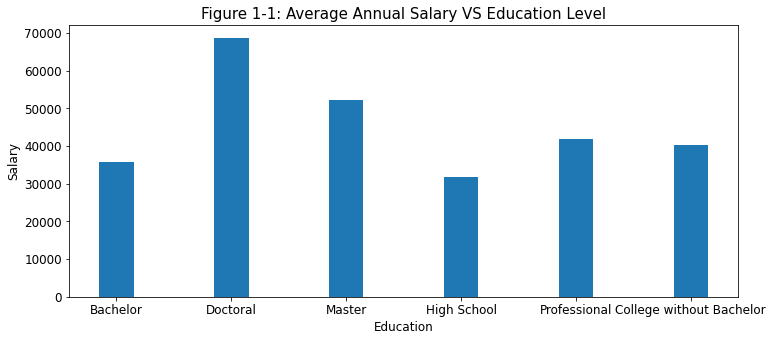

In [81]:
#Plot the bar chart of the Average Annual Salary VS Education Level 
labels = ['Bachelor', 'Doctoral', 'Master','High School', 'Professional', 'College without Bachelor']
plt.figure(figsize=(12,5))
plt.bar(labels,Edu_Salary['Salary'],width = 0.3)
plt.title('Figure 1-1: Average Annual Salary VS Education Level',fontsize=15)
plt.xlabel('Education')
plt.ylabel('Salary') 
plt.show()

From the plot of Average Annual Salary Vs Education Level, we can see that the salary is positively correlated with the education level in general. However, higher education may not result in higher salary. For example, the average annual salary (40407) of people from some college without earning the bachelor degree is a little bit higher than the average annual salary (35732) of people who has bachelor degree. This could be caused by some other factors: Years of Experience, Gender and position type. Thus, we will study some other features and relationships in the following sections. 


## Problem 1:

**Plot 2: Percentage of each position and Number of Men and Women for each Position** 

In this part, we will first plot the pie chart of the percentage of each postion to see which position has the most people. Then, we will plot the distribution of men and women of each position. According to the object of this assignment, we want to study the nautre of women's representation in Data Science and Machine Learning. We only compare the data of men and women in this part. 

In [82]:
#Count the total number of people in each position
Prof = df_temp['Profession'].value_counts()
Prof = Prof.to_frame()
display(Prof)
type(Prof)


,Profession
Data Scientist,2398
Software Engineer,1620
Other,1508
Data Analyst,1260
Research Scientist,1028
Machine Learning Engineer,918
Business Analyst,678
Product/Project Manager,590
Data Engineer,369
Statistician,248


pandas.core.frame.DataFrame

In [83]:
#obtain the label of the pie chart
label = Prof.index
label

Index(['Data Scientist', 'Software Engineer', 'Other', 'Data Analyst',
       'Research Scientist', 'Machine Learning Engineer', 'Business Analyst',
       'Product/Project Manager', 'Data Engineer', 'Statistician',
       'DBA/Database Engineer'],
      dtype='object')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: MatplotlibDeprecationWarning: Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.
  This is separate from the ipykernel package so we can avoid doing imports until


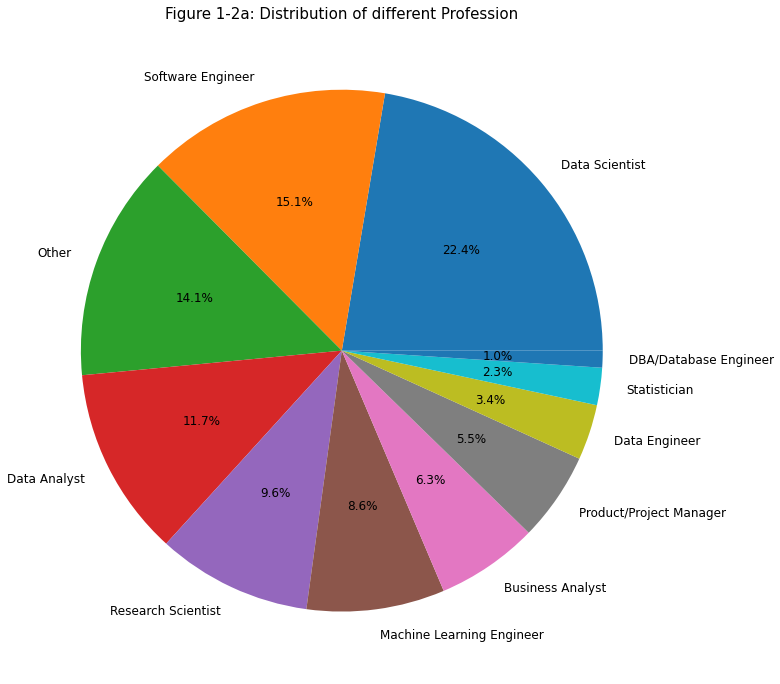

In [84]:
#plot the percentage of each position
plt.figure(figsize=(12,12))
plt.pie(Prof,labels = label, autopct='%1.1f%%')
plt.rcParams['font.size'] = 12
plt.title('Figure 1-2a: Distribution of different Profession', fontsize = 15)
plt.show() 


From the table and the pie plot above, the data scientist takes the most percentage (22.4%) amoung all the jobs. DBA/Database Engineer has the least amount of people (1.0%). Exclude "other jobs", Data Scientist, Softeare Engineer and Data Analyst are the top 3 jobs with most people. In the next section, we will study the distribution of men and women amoung all the positions. For this assignment, we focus on the trend of men and women, so we only take the data of men and women in the following sections. 

In [85]:
#Check the different items in the gender column
display(df_temp['Gender'].unique())


array(['Man', 'Woman', 'Nonbinary', 'Prefer not to say',
       'Prefer to self-describe'], dtype=object)

In [86]:
#only take the data of man and woman, because we want to study the nature of women's representation 
Profession_male = df_temp['Profession'][df_temp['Gender'] == "Man"].value_counts().sort_index()
print('The distribution of men of aall positions:')
display(Profession_male)
Profession_female = df_temp['Profession'][df_temp['Gender'] == "Woman"].value_counts().sort_index()
print('The distribution of women of aall positions:')
display(Profession_female)


The distribution of men of aall positions:


Business Analyst              544
DBA/Database Engineer          94
Data Analyst                  965
Data Engineer                 316
Data Scientist               2002
Machine Learning Engineer     800
Other                        1244
Product/Project Manager       518
Research Scientist            808
Software Engineer            1391
Statistician                  190
Name: Profession, dtype: int64

The distribution of women of aall positions:


Business Analyst             123
DBA/Database Engineer         12
Data Analyst                 284
Data Engineer                 49
Data Scientist               360
Machine Learning Engineer    104
Other                        242
Product/Project Manager       62
Research Scientist           191
Software Engineer            200
Statistician                  56
Name: Profession, dtype: int64

In [87]:
#Chamge the array into dataframe 
Profession_female.to_frame()
Profession_male.to_frame()
#get the label of the plot
xlabel = Profession_female.index.to_list()
print("All the positions: ", xlabel)

All the positions:  ['Business Analyst', 'DBA/Database Engineer', 'Data Analyst', 'Data Engineer', 'Data Scientist', 'Machine Learning Engineer', 'Other', 'Product/Project Manager', 'Research Scientist', 'Software Engineer', 'Statistician']


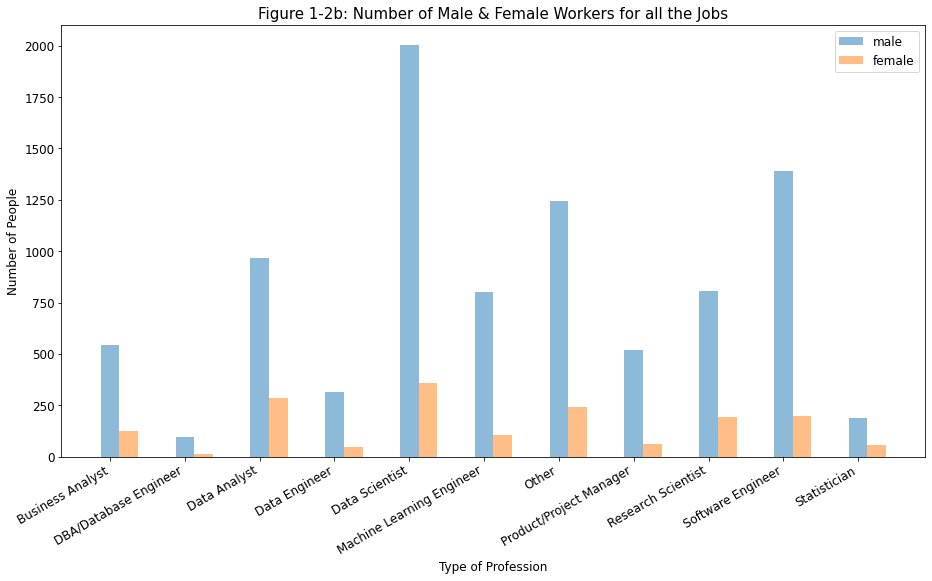

In [88]:
#Plot the distribution of Man and Women of each position 
fig = plt.figure(figsize=(12,6))
ax = fig.add_axes([0,0,1,1])
x_position = np.arange(len(xlabel))
ax.bar(x_position + 0.00, Profession_male,alpha = 0.5,width = 0.25, label = 'male' )
ax.bar(x_position + 0.25, Profession_female, alpha = 0.5, width = 0.25, label = 'female' )
ax.set_xticks(x_position)
ax.set_xticklabels(xlabel , rotation=30, ha='right')
ax.legend()
ax.set_xlabel('Type of Profession')
ax.set_ylabel('Number of People')
ax.set_title('Figure 1-2b: Number of Male & Female Workers for all the Jobs', fontsize = 15)
plt.show()

From the graph of the Number of Male & Female Workers for all the Jobs, for all the positions, the number of men is much larger than the number of women. Women is minority in the field of data analysis and machine learining. The difference betweeen the number of men amoung different positions is larger than women. The distribution of women is more even, because the total number of population of women is much smaller. 

## Problem 1:

**Plot 3: Salary VS Years of Experience of Male & Female Workers for all the Jobs** 

In this part, we will study the relationship between the average salary and the years of experience of men and women. 


In [89]:
#Group the data by year of experience and calculate the averge annual salary 
Experience_Male = df_temp.groupby(['Gender','Year of experience']).mean().loc['Man']
Experience_Female = df_temp.groupby(['Gender','Year of experience']).mean().loc['Woman']
#Add index column and sort by index
Experience_Male['index']= [2,5,6,3,4,1,0]
Experience_Male = Experience_Male.sort_values(by='index')
Experience_Female['index']= [2,5,6,3,4,1,0]
Experience_Female = Experience_Female.sort_values(by='index')
#show the table
print('The average salary of different years of experience of men:')
display(Experience_Male)
print('The average salary of different years of experience of men:')
display(Experience_Female)


The average salary of different years of experience of men:


,Salary,index
Year of experience,,
I have never written code,29207.711443,0
< 1 years,25887.269193,1
1-2 years,25994.051553,2
3-5 years,38461.557664,3
5-10 years,59185.687264,4
10-20 years,76934.078643,5
20+ years,97754.798464,6


The average salary of different years of experience of men:


,Salary,index
Year of experience,,
I have never written code,21472.972973,0
< 1 years,19439.330544,1
1-2 years,24275.204360,2
3-5 years,33191.931540,3
5-10 years,49983.928571,4
10-20 years,71837.500000,5
20+ years,68650.000000,6


array([0, 1, 2, 3, 4, 5, 6])

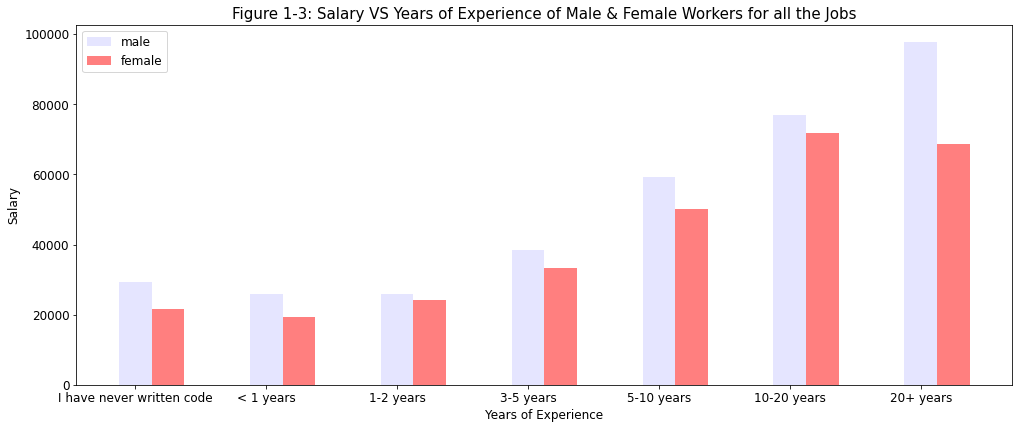

In [90]:
#plot the graph of Salary VS Years of Experience
fig = plt.figure(figsize=(13,5))
ax = fig.add_axes([0,0,1,1])
x_position = Experience_Male['index'].to_numpy()
display(x_position)# check the position index
ax.bar(x_position , Experience_Male['Salary'], color = 'b',alpha = 0.1,width = 0.25, label = 'male' )
ax.bar(x_position + 0.25 , Experience_Female['Salary'], color = 'r', alpha = 0.5, width = 0.25, label = 'female')
ax.set_xticks(x_position)
ax.set_xticklabels(Experience_Male.index )
ax.legend()
ax.set_xlabel('Years of Experience')
ax.set_ylabel('Salary')
ax.set_title('Figure 1-3: Salary VS Years of Experience of Male & Female Workers for all the Jobs', fontsize = 15)
plt.show()

According to the plot above, the average annual salary has positive correlation with years of experience in general. There are two interesting findings. The first is that, for women, the averge annual salary of 10-20 years is higher than 20+ years. For both men and women, the salaries of 0-2 years are very close. 

# **Problem 2:**


In this part, we will sudy the difference between average salary of men versus women. 

## **Part a**

In this section, we will form 2 dataframes for men and women. The summary of the dataframe is shown below.

In [91]:
Gender_sal = df_temp[['Gender','Salary']]
display(Gender_sal.head())#show the top 5 rows of the table of geneder and salary
print('The number of null values:')
print(Gender_sal.isnull().sum())#check the null values
print('The summary of the average annual salary of all geneder:')
display(Gender_sal.describe())
print('Median salary of all gender: ', Gender_sal.median())

,Gender,Salary
1,Man,125000
2,Man,20000
3,Man,150000
8,Man,80000
11,Man,40000


The number of null values:
Gender    0
Salary    0
dtype: int64
The summary of the average annual salary of all geneder:


,Salary
count,10729.000000
mean,48777.239258
std,69458.784233
min,1000.000000
25%,2000.000000
50%,20000.000000
75%,70000.000000
max,500000.000000


Median salary of all gender:  Salary    20000.0
dtype: float64


In general, the average annual salary of all geneders is 48777, the median is 20000 and te standard deviation is 69458.

In [92]:
#generate a dataframe of man and show the desctibe of the dataset
male_sal = Gender_sal[Gender_sal['Gender']=='Man']
display(male_sal.head())
print('The summary of the average annual salary of men:')
display(male_sal.describe())
print('The median salary of men: ', male_sal.median())

,Gender,Salary
1,Man,125000
2,Man,20000
3,Man,150000
8,Man,80000
11,Man,40000


The summary of the average annual salary of men:


,Salary
count,8872.000000
mean,50750.619928
std,70347.974812
min,1000.000000
25%,3000.000000
50%,25000.000000
75%,70000.000000
max,500000.000000


The median salary of men:  Salary    25000.0
dtype: float64


In [93]:
#generate a dataframe of man and show the desctibe of the dataset

female_sal = Gender_sal[Gender_sal['Gender']=='Woman']
display(female_sal.head())
print('The summary of the average annual salary of women:')
display(female_sal.describe())
print('The median salary of women: ', female_sal.median())

,Gender,Salary
20,Woman,2000
22,Woman,150000
30,Woman,20000
34,Woman,150000
44,Woman,2000


The summary of the average annual salary of women:


,Salary
count,1683.000000
mean,36417.112299
std,59442.716093
min,1000.000000
25%,1000.000000
50%,7500.000000
75%,50000.000000
max,500000.000000


The median salary of women:  Salary    7500.0
dtype: float64


For the men dataset, the mean is 50750.62. The median is 25000 and the standard deviation is 70347.97. For the women dataset, the mean is 36417.11. The median is 7500.0 and the standard deviation is 59442.71. 

Obviously, the average annual salary of men is higher than women. Women dataset has smaller standard deviation, so the annual salary of women is more close. Compared with the mean & median of the whole population, the mean and median of women is much lower. 

In the following sections, we will plot boxplot and histogram of two dataset to see the distributions. 

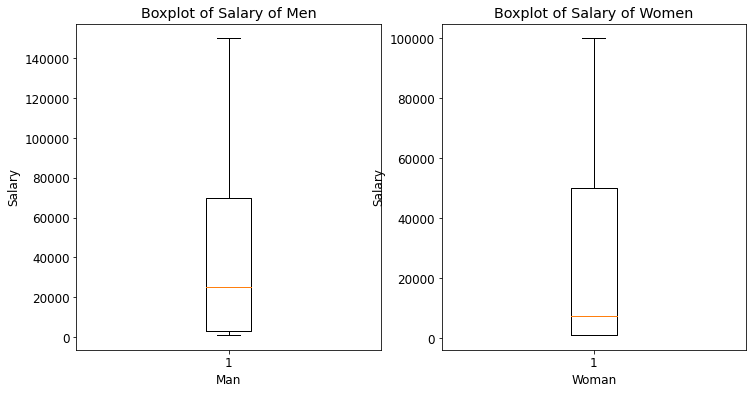

In [94]:
#Plot the distribution of the salary of men and women in the boxplot
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,6))
ax1.boxplot(male_sal['Salary'],showfliers=False) 
ax1.set_title("Boxplot of Salary of Men")
ax1.set(xlabel="Man", ylabel="Salary")

ax2.boxplot(female_sal['Salary'],showfliers=False)  
ax2.set_title("Boxplot of Salary of Women")
ax2.set(xlabel="Woman", ylabel="Salary")

plt.show()

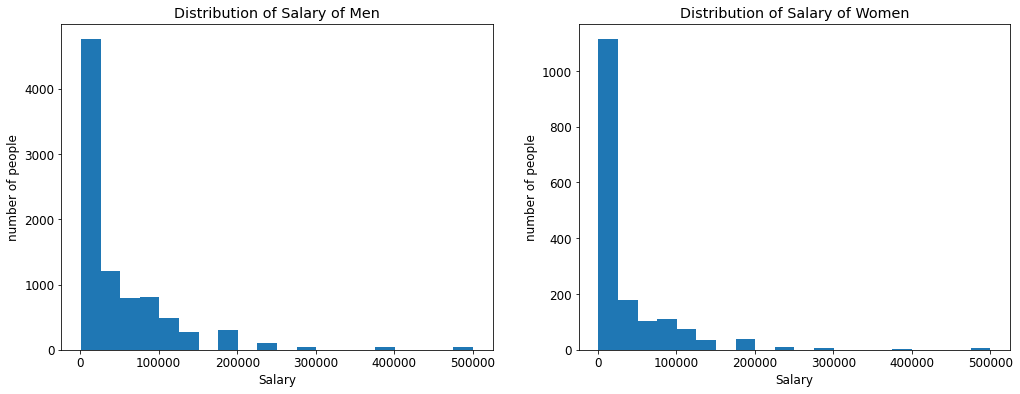

In [95]:
#Plot the distribution of the salary of men and women
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(17,6))
ax1.hist(male_sal['Salary'], bins=20) 
ax1.set_title("Distribution of Salary of Men")
ax1.set(xlabel="Salary", ylabel="number of people")

ax2.hist(female_sal['Salary'], bins=20) 
ax2.set_title("Distribution of Salary of Women")
ax2.set(xlabel="Salary", ylabel="number of people")
plt.show()

From the boxplot and histogram, both dataset are positively skewed. There is a flat tail at the right side of the data. This means there are several outliers (people have high income). From the boxplot, we can see that the women dataset has less outliers and has less variance. Most people have low salary, the number of peoeple with salary higher than 50000 decreases dramaticaly. 

# **Part b** 
In this part, we try to perform two-sample t-test to check the null assumption: two dataset has equal mean. 

First, we need to check the assumptions of the two-sample t-test:

1. Two datasets have equal variance.
2. Two datasets are randomly sampled
3. Two datasets have normal distribution.
4. Two datasets are independent. 

In [96]:
#Check the variance difference of two datasets
male_var = np.var(male_sal['Salary'])
female_var = np.var(female_sal['Salary'])
print('Variance of salary of men: ', male_var)
print('Variance of salary of women: ', female_var )
print('Variance ratio: ', male_var/female_var )

Variance of salary of men:  4948279756.152964
Variance of salary of women:  3531337009.6053066
Variance ratio:  1.4012482362044587


Since the variance ratio is 1.40, we can assume 2 dataset have equal variance in this case. 

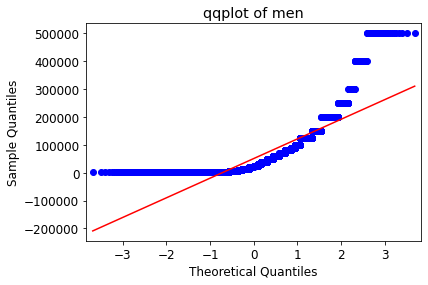

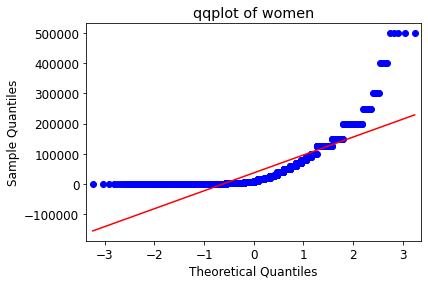

In [97]:
#Plot qqplot to check whether the men and women datasets are normal distribution
from statsmodels.graphics.gofplots import qqplot
qqplot(male_sal['Salary'], line='s')
plt.title('qqplot of men')
plt.show()
qqplot(female_sal['Salary'], line='s')
plt.title('qqplot of women')
plt.show()

From the qqplots and the histograms above, both datasets have positively skewed distribution. Hence, in this case the assumption of two-sample t-test is not satisfied, so we cannot apply t-test to the datasets directly. There are some methods to do. First, we will use bootstrap to get datasets of mean. According to central limit theorem, the mean values of the random sampling should follow normal distribution and we can apply t-test on the bootstrapped data. Second, we can apply nonparametric test that does not require normal distribution of dataset. For example Mann-Whitney U test can be applied. 

In [98]:
#Perform t-test
print('Null hypothesis: two datasets have same mean. ')
t_test_result = stats.ttest_ind(a= male_sal['Salary'], b=female_sal['Salary'], equal_var=True)
print('T-value = ', t_test_result[0])
print('p-value = ', t_test_result[1])
if t_test_result[1] > 0.05:
  print('The null hypothesis is correct, two datasets are not statically significant ')
else:
  print('The null hypothesis is rejected, two datasets are statically significant')

Null hypothesis: two datasets have same mean. 
T-value =  7.844333791744695
p-value =  4.77315104074462e-15
The null hypothesis is rejected, two datasets are statically significant


As discussed above, the assumption is not satisfied, so t-test result is not accurate. We should consult the t-test results of the bootstrapped data. 

# **Part c** 
Bootstrap the data to compare the mean of salary.

In [115]:
print("Total number of male samples: ", len(male_sal))
print("Total number of female samples: ", len(female_sal))

Total number of male samples:  8872
Total number of female samples:  1683


In [116]:
#######################
#The bootstrap function
#Input is the datset and number of replications
#output is the list of mean of each bootstrapped dataset
#This function randomly randomly sampled from the input dataset and generate a bootstrapped dataset with the same number of samples as the original dataset
#This function calculate the mean of each bootstrap dataset and stored in a list
#######################
def bootstrap_data (data, iteration):
  sample_mean = []
  for i in range(iteration):
    avg_temp = np.mean(np.random.choice(data,size=len(data)))
    sample_mean.append(avg_temp)
  return sample_mean


In [117]:
#bootstrap men dataset
man_sal_bootstrap = bootstrap_data (male_sal['Salary'].tolist(), 1000)
man_sal_bootstrap = np.array(man_sal_bootstrap)
print('The number of men bootstrapped data: ' ,len(man_sal_bootstrap))# check the outpust list size

The number of men bootstrapped data:  1000


In [118]:
#bootstrap women dataset
woman_sal_bootstrap = bootstrap_data (female_sal['Salary'].tolist(), 1000)
woman_sal_bootstrap = np.array(woman_sal_bootstrap)

print('The number of women bootstrapped data: ' ,len(woman_sal_bootstrap))

The number of women bootstrapped data:  1000


In [119]:
#Calculate the difference of mean
mean_difference = man_sal_bootstrap-woman_sal_bootstrap

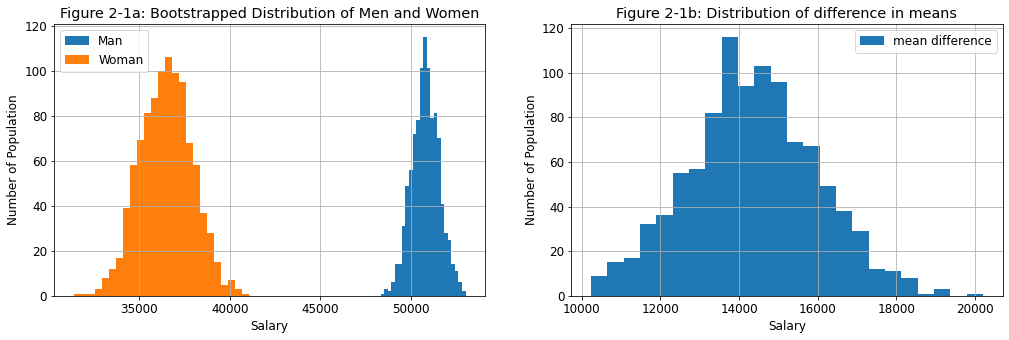

In [120]:
#plot the distribution of bootstrapped data
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(17,5))
ax1.hist(man_sal_bootstrap, bins='auto',label='Man')  
ax1.hist(woman_sal_bootstrap, bins='auto', label= 'Woman')  
ax1.set_title('Figure 2-1a: Bootstrapped Distribution of Men and Women')
ax1.set(xlabel = 'Salary',ylabel = 'Number of Population')
ax1.legend()
ax1.grid()
ax2.hist(mean_difference, bins = 'auto', label = 'mean difference')
ax2.set_title('Figure 2-1b: Distribution of difference in means')
ax2.set(xlabel = 'Salary',ylabel = 'Number of Population')
ax2.legend()
ax2.grid()

According to the plots above, the bootstrapped distributions for men and women are normal distributions. The distribution of difference in means is also normal distribution. Thus, we can process to two-sample t-test. 

Besides, the bootstrapped distribution of men has less variance than women and two datasets are significantly different. 

# **Part d** 
Perform two-sample t-test with 0.05 threshold on bootstrapped data

In [121]:
boot_male_var = np.var(man_sal_bootstrap)
boot_female_var = np.var(woman_sal_bootstrap)
print('Variance of bootstrapped data of men: ', boot_male_var)
print('Variance of bootstrapped data of women: ', boot_female_var )
print('Variance ratio of bootstrapped data: ', boot_female_var/boot_male_var )

Variance of bootstrapped data of men:  572727.1687546618
Variance of bootstrapped data of women:  2078711.7958512814
Variance ratio of bootstrapped data:  3.629497445304076


In [122]:
print('Null hypothesis: two datasets have same mean. ')
t_test_result = stats.ttest_ind(a= man_sal_bootstrap, b=woman_sal_bootstrap, equal_var=True)
print('T-value = ', t_test_result[0])
print('p-value = ', t_test_result[1])
if t_test_result[1] > 0.05:
  print('The null hypothesis is correct, two datasets are not statically significant ')
else:
  print('The null hypothesis is rejected, two datasets are statically significant')

Null hypothesis: two datasets have same mean. 
T-value =  278.67609063627725
p-value =  0.0
The null hypothesis is rejected, two datasets are statically significant


The t test statistic is 278 and the corresponding two-sided p-value is 0.0. This is much smaller than the threshold (0.05). Thus, the two datasets have very different mean and the mean of the men's salary is much higher than women's salary. This corresponds to the results in part a. 


# **Part e** 
Findings:  
In general, the average annual salary of men is much higher than women. Women's salary has less variance and outliers. As salary increases, the number of population decreases. 

As discussed above, the mean of the men dataset is much larger than the mean of women dataset. The difference between two datasets are statistically significant. The null hypothesis (equal mean) is rejected. 

Bootstrapp is a easy way to do random sampling and approximate the whole population. This saves time and money. It also helps us to transform the original dataset (positively skewed) into normal distribution, so we can apply t-test on the bootstrapped data. 

## Problem 3
# **Part a**
Obtain the descriptive statistics for men and women of highest level of formal education

In [123]:
#generate a dataframe of education and salary and show the description of the dataset
Education_sal = df_temp[['Education','Salary']]
print('The number of null values: ', Education_sal.isnull().sum())#check the null item in the dataset
display(Education_sal.head())



The number of null values:  Education    0
Salary       0
dtype: int64


,Education,Salary
1,Master’s degree,125000
2,Bachelor’s degree,20000
3,Master’s degree,150000
8,Doctoral degree,80000
11,Doctoral degree,40000


In [124]:
print('The summary of the Education level and average annual salary')
display(Education_sal.describe())
print('Median salary is : ', Education_sal.median())
print('All the education levels: ', Education_sal['Education'].unique())#Check all the items in education

The summary of the Education level and average annual salary


,Salary
count,10729.000000
mean,48777.239258
std,69458.784233
min,1000.000000
25%,2000.000000
50%,20000.000000
75%,70000.000000
max,500000.000000


Median salary is :  Salary    20000.0
dtype: float64
All the education levels:  ['Master’s degree' 'Bachelor’s degree' 'Doctoral degree'
 'Some college/university study without earning a bachelor’s degree'
 'Professional degree' 'I prefer not to answer'
 'No formal education past high school']


From the table, the average salary of whole population is 45777, the median is 20000. This corresponds to the results in Problem 2, Part a. 

In [125]:
#generate the dataset for bachelor , master and doctoral degree
Bachelor_sal = Education_sal[Education_sal['Education']=="Bachelor’s degree"]
Master_sal = Education_sal[Education_sal['Education']=="Master’s degree"]
Doctor_sal = Education_sal[Education_sal['Education']=="Doctoral degree"]
#display the summary of datasets
print("The summary of the salary distribution of Bachelor's degree")
display(Bachelor_sal.describe())
print('Median salary is : ', Bachelor_sal.median())
print("The summary of the salary distribution of Master's degree")
display(Master_sal.describe())
print('Median salary is : ', Master_sal.median())
print("The summary of the salary distribution of Doctoral degree")
display(Doctor_sal.describe())
print('Median salary is : ',Doctor_sal.median())


The summary of the salary distribution of Bachelor's degree


,Salary
count,3013.000000
mean,35732.824427
std,60247.753546
min,1000.000000
25%,1000.000000
50%,10000.000000
75%,50000.000000
max,500000.000000


Median salary is :  Salary    10000.0
dtype: float64
The summary of the salary distribution of Master's degree


,Salary
count,4879.000000
mean,52120.106579
std,67681.571528
min,1000.000000
25%,4000.000000
50%,25000.000000
75%,70000.000000
max,500000.000000


Median salary is :  Salary    25000.0
dtype: float64
The summary of the salary distribution of Doctoral degree


,Salary
count,1718.000000
mean,68719.441211
std,85403.650394
min,1000.000000
25%,5000.000000
50%,40000.000000
75%,90000.000000
max,500000.000000


Median salary is :  Salary    40000.0
dtype: float64


For Bachelor dataset, the mean is 35732. The median is 10000 and the standard deviation is 60247. For Master dataset, the mean is 52120. The median is 25000 and the standard deviation is 67681. For Doctoral dataset, the mean is 68719. The median is 40000 and the standard deviation is 85403. We can see the trend that higher education level causes higher annual salary. 

We will plot the boxplots and histograms below to study the distributions of the datasets. 

[Text(0, 0.5, 'Salary'), Text(0.5, 0, 'Doctoral Degree')]

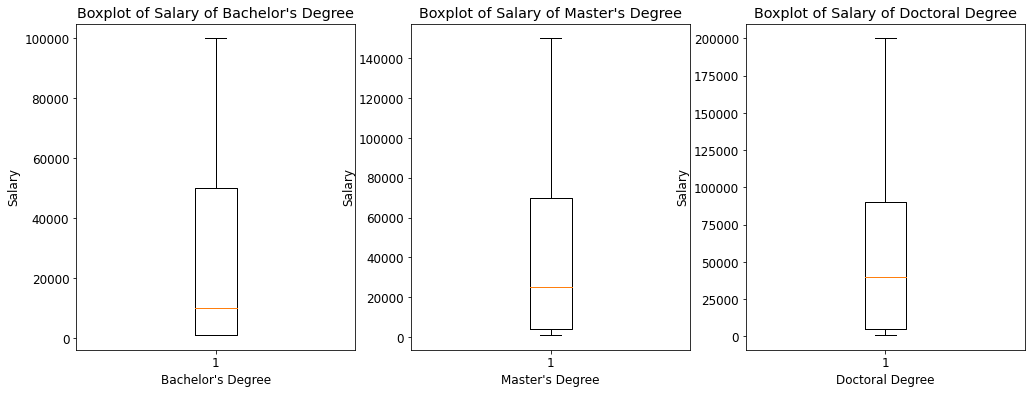

In [126]:
#Plot the distribution of salary in boxplots
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(17,6))
ax1.boxplot(Bachelor_sal['Salary'],showfliers=False) 
ax1.set_title("Boxplot of Salary of Bachelor's Degree")
ax1.set(xlabel="Bachelor's Degree", ylabel="Salary")

ax2.boxplot(Master_sal['Salary'],showfliers=False)  
ax2.set_title("Boxplot of Salary of Master's Degree")
ax2.set(xlabel="Master's Degree", ylabel="Salary")

ax3.boxplot(Doctor_sal['Salary'],showfliers=False)  
ax3.set_title("Boxplot of Salary of Doctoral Degree")
ax3.set(xlabel="Doctoral Degree", ylabel="Salary")


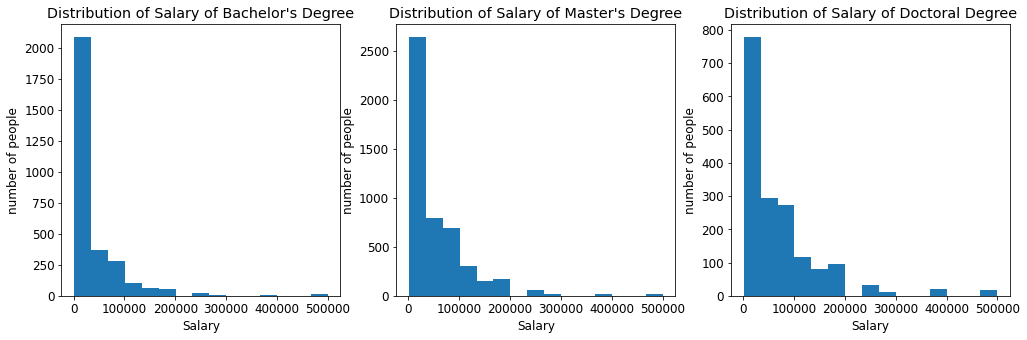

In [127]:
#plot the distribution in histogram
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(17,5))
ax1.hist(Bachelor_sal['Salary'], bins=15) 
ax1.set_title("Distribution of Salary of Bachelor's Degree")
ax1.set(xlabel="Salary", ylabel="number of people")

ax2.hist(Master_sal['Salary'], bins=15) 
ax2.set_title("Distribution of Salary of Master's Degree")
ax2.set(xlabel="Salary", ylabel="number of people")

ax3.hist(Doctor_sal['Salary'], bins=15) 
ax3.set_title("Distribution of Salary of Doctoral Degree")
ax3.set(xlabel="Salary", ylabel="number of people")
plt.show()

From the boxplot and histogram, similar to Problem 2, all datasets are positively skewed. There is a flat tail at the right side of the data. This means there are several outliers (people have high income). From the boxplot, we can see that the Bachelor dataset has less outliers and has less variance. Most people have low salary, there are very little amount of people have salary higher than 200000. 

# **Part b**
Apply ANOVA to obtain the F-value and p-value of the datasets. The compare whether the mean of the three datasets are significantly different. The threshold is 0.05.

First, we need to check the assumptions of the two-sample t-test:

1. The datasets have equal variance.
2. The datasets are randomly sampled
3. The datasets have normal distribution.
4. The datasets are independent. 

In [129]:
#Check the variance difference of datasets
print('Variance of salary of Bachelor: ',np.var(Bachelor_sal['Salary']))
print('Variance of salary of Master: ', np.var(Master_sal['Salary']) )
print('Variance of salary of Doctoral: ', np.var(Doctor_sal['Salary']))

Variance of salary of Bachelor:  3628587097.13386
Variance of salary of Master:  4579856244.628926
Variance of salary of Doctoral:  7289537992.237206


As shown above, the variance are not very different. We can assume equal variance here. 

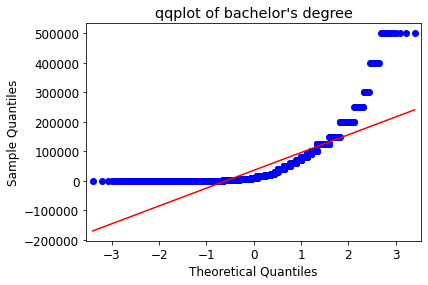

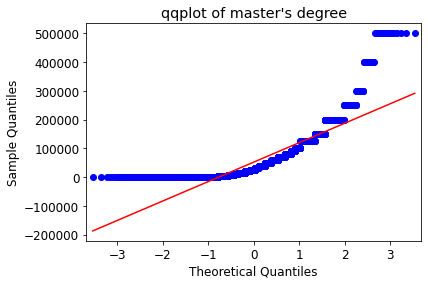

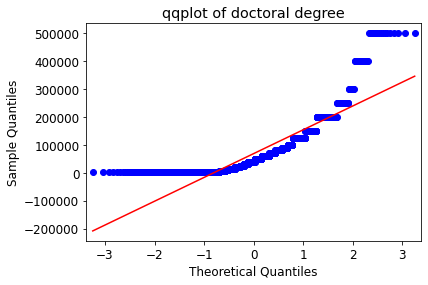

In [130]:
#Plot qq plot to check normality
qqplot(Bachelor_sal['Salary'], line='s')
plt.title("qqplot of bachelor's degree")
qqplot(Master_sal['Salary'], line='s')
plt.title("qqplot of master's degree")
qqplot(Doctor_sal['Salary'], line='s')
plt.title("qqplot of doctoral degree")
plt.show()

From the qqplots and the histograms above, both datasets have positively skewed distribution. Hence, in this case the assumption of ANOVA is not satisfied, so we cannot apply ANOVA to the datasets directly. There are also alternatives. First, following the same process as Problem 2,  we will use bootstrap to get datasets of mean, and we can apply ANOVA on the bootstrapped data. Second, we can apply nonparametric test that does not require normal distribution of dataset. For example Kruskal-Wallis H-test can be applied. 

In [131]:
print('Null hypothesis of ANOVA: the means of all datasets are equal. ')
ANOVA_result = stats.f_oneway(Bachelor_sal['Salary'],Master_sal['Salary'],Doctor_sal['Salary'])
print('The f-value of the ANOVA: ', ANOVA_result[0])
print('The p-value of the ANOVA: ', ANOVA_result[1])
print('The threshold is: ', 0.05)
if ANOVA_result[1] > 0.05:
  print('The null hypothesis is correct,  datasets are not statically significant ')
else:
  print('The null hypothesis is rejected,  datasets are statically significant')

Null hypothesis of ANOVA: the means of all datasets are equal. 
The f-value of the ANOVA:  129.7560112960932
The p-value of the ANOVA:  2.4852074227874282e-56
The threshold is:  0.05
The null hypothesis is rejected,  datasets are statically significant


As discussed above, the assumption is not satisfied, so ANOVA result is not accurate. We should consult the ANOVA results of the bootstrapped data. 

# **Part c**
Bootstrap the dataset and use 1000 replications. 

In [132]:
#Apply the function that is defined in Question 2 part c to apply bootstrap
bach_bootstrap = bootstrap_data (Bachelor_sal['Salary'].tolist(), 1000)
bach_bootstrap = np.array(bach_bootstrap)
print('The size of bootstrapped data: ', len(bach_bootstrap))

The size of bootstrapped data:  1000


In [133]:
mas_bootstrap = bootstrap_data (Master_sal['Salary'].tolist(), 1000)
mas_bootstrap = np.array(mas_bootstrap)
print('The size of bootstrapped data: ', len(mas_bootstrap))

The size of bootstrapped data:  1000


In [134]:
doc_bootstrap = bootstrap_data (Doctor_sal['Salary'].tolist(), 1000)
doc_bootstrap = np.array(doc_bootstrap)
print('The size of bootstrapped data: ', len(doc_bootstrap))

The size of bootstrapped data:  1000


In [135]:
#calculate the mean difference
mean_bach_mas = mas_bootstrap - bach_bootstrap
mean_bach_doc = doc_bootstrap - bach_bootstrap
mean_mas_doc = doc_bootstrap - mas_bootstrap


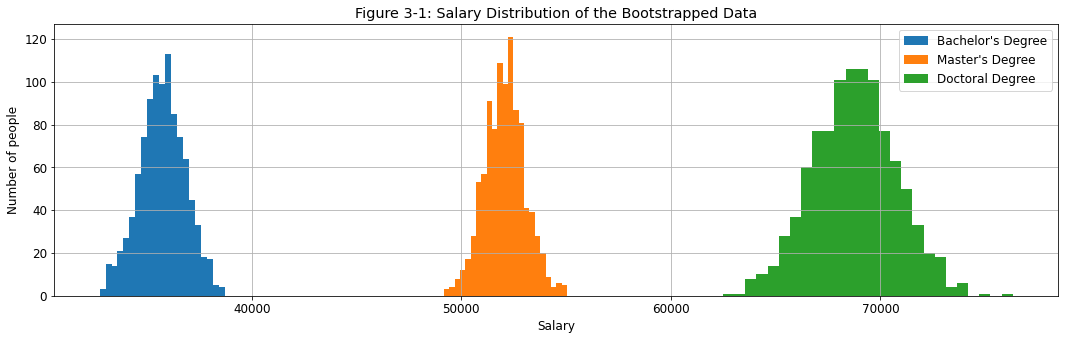

In [136]:
#Plot the bootstrapped mean distribution
plt.figure(figsize=(18,5))
plt.hist(bach_bootstrap, bins='auto',label="Bachelor's Degree")  
plt.hist(mas_bootstrap, bins='auto',label="Master's Degree")  
plt.hist(doc_bootstrap, bins='auto',label="Doctoral Degree") 
plt.title("Figure 3-1: Salary Distribution of the Bootstrapped Data") 
plt.xlabel("Salary")
plt.ylabel("Number of people")
plt.legend()
plt.grid()
plt.show()

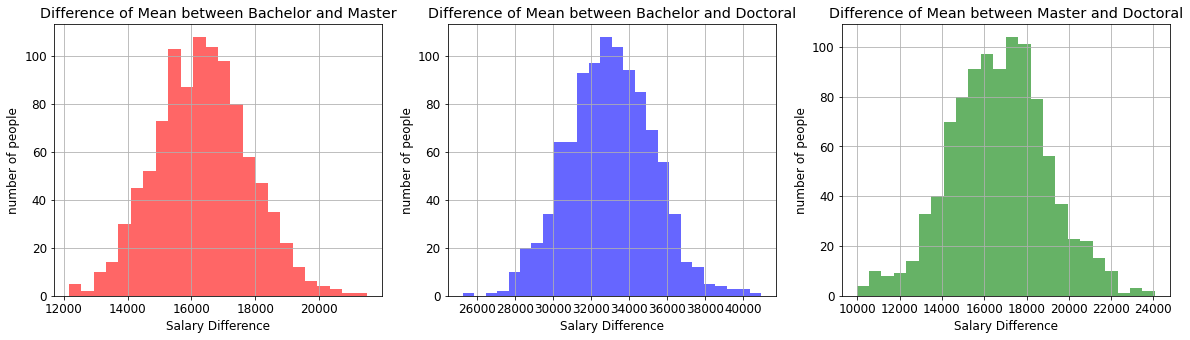

In [137]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20,5))
ax1.hist(mean_bach_mas, bins='auto', color='red',alpha = 0.6) 
ax1.set_title("Difference of Mean between Bachelor and Master")
ax1.set(xlabel="Salary Difference", ylabel="number of people")
ax1.grid()

ax2.hist(mean_bach_doc, bins='auto',color='blue',alpha = 0.6) 
ax2.set_title("Difference of Mean between Bachelor and Doctoral")
ax2.set(xlabel="Salary Difference", ylabel="number of people")
ax2.grid()


ax3.hist(mean_mas_doc, bins='auto', color='green',alpha = 0.6) 
ax3.set_title("Difference of Mean between Master and Doctoral")
ax3.set(xlabel="Salary Difference", ylabel="number of people")
ax3.grid()
plt.show()

According to the plots above, the bootstrapped distributions are normal distributions. The distribution of difference in means is also normal distribution. Thus, we can process to ANOVA. 

Obviously, the variance of bootstrapped data of doctoral is larger than the other 2 samples. 

# **Part d**
Perform ANOVA on the bootstrapped dataset 

In [138]:
#Check the variance
boot_bach_var = np.var(bach_bootstrap)
boot_mas_var = np.var(mas_bootstrap)
boot_doc_var = np.var(doc_bootstrap)
print('Variance of bootstrapped data of bachelor: ', boot_bach_var)
print('Variance of bootstrapped data of master: ', boot_mas_var )
print('Variance of bootstrapped data of doctoral: ', boot_doc_var )


Variance of bootstrapped data of bachelor:  1167209.6518462035
Variance of bootstrapped data of master:  936458.5174280826
Variance of bootstrapped data of doctoral:  3997823.6565170223


The variance are not very different, so we can assume equal variance in this problem. 

In [139]:
#Perform the anova test on bootstrapped datasets
print('Null hypothesis of ANOVA: the means of all datasets are equal. ')

ANOVA_result = stats.f_oneway(bach_bootstrap,mas_bootstrap,doc_bootstrap)
print('The f-value of the ANOVA: ', ANOVA_result[0])
print('The p-value of the ANOVA: ', ANOVA_result[1])
print('The threshold is: ', 0.05)
t_val, p_val = stats.ttest_ind(a= man_sal_bootstrap, b=woman_sal_bootstrap)
#compare with threshold and check the null hypothesis
if ANOVA_result[1] > 0.05:
  print('The null hypothesis is correct, datasets are not statically significant ')
else:
  print('The null hypothesis is rejected, datasets are statically significant')

Null hypothesis of ANOVA: the means of all datasets are equal. 
The f-value of the ANOVA:  133894.18190414828
The p-value of the ANOVA:  0.0
The threshold is:  0.05
The null hypothesis is rejected, datasets are statically significant


Since the mean distributions are normal distribution, we can apply one-way ANOVA test. We assume they have equal variance. The f-value is 133894. The p-value is 0.0. The p-value is much smaller than the threshold (0.05).

Thus, the null hypothesis (equal means) is rejected, and difference in means of three datasets are statically significant. People with higher education level will have higher average annual salary.

# **Part e**
Findings:

In general, the average annual salary of doctoral is highest. Data of bachelor degree and master degree have similar variance. For higher education, salary will be higher. As salary increases, the number of population decreases. However, we do not consider other education levels such as college and high school in this problem. There could be some outliers. 

As discussed above, the mean of doctoral dataset is much larger than the other two. The difference between three datasets are statistically significant. The null hypothesis (equal mean) is rejected. 

Same as Problem2, we can obtain the same conclusion that bootstrapp is a easy way to do random sampling and approximate the whole population. This saves time and money. It also helps us to transform the original dataset (positively skewed) into normal distribution, so we can apply ANOVA on the bootstrapped data. 